# SPNC thermals
Code for experimenting with the effects of thermal variation on ML performance

Set up imports:

In [1]:
"""
Import handeling and Dependancy info

Local Dependancies
------------------
machine_learning_library  : v0.1.2
    This repository will need to be on your path in order to work.
    This is achieved with repo_tools module and a path find function
    Add to the searchpath and repos tuples if required


"""

import numpy as np
import matplotlib.pyplot as plt

# Sort out relative paths
import sys
from pathlib import Path
repodir = Path('..').resolve()
try:
    sys.path.index(str(repodir))
except ValueError:
    sys.path.append(str(repodir))

#tuple of Path variables
searchpaths = (Path.home() / 'repos', )
#tuple of repos
repos = ('machine_learning_library',)

# local imports
from SPNC import spnc
#ML specific
from SPNC.deterministic_mask import fixed_seed_mask, max_sequences_mask
import SPNC.repo_tools
SPNC.repo_tools.repos_path_finder(searchpaths, repos) #find ml library
from single_node_res import single_node_reservoir
import ridge_regression as RR
from linear_layer import *
from mask import binary_mask
from utility import *
from NARMA10 import NARMA10
from sklearn.metrics import classification_report

Establish shared parameters

In [2]:
'''
NARMA10 response
'''

plt.rcParams['text.usetex'] = True

figurewidth = 3.37*2.5
figureaspect = 2/3
figureheight = figurewidth*figureaspect

# NARMA parameters
Ntrain = 100
Ntest = 50

# Net Parameters
Nvirt = 5
m0 = 0.003
bias = True

# Misc parameters
seed_NARMA = 1234
fixed_mask = False
spacer = 5

theta = 0.4
gamma = 0.132
delay_feedback = 0
params = {'theta': theta, 'gamma' : gamma,'delay_feedback' : delay_feedback,'Nvirt' : Nvirt}


def get_res(h=0.4,theta_H=90,k_s_0=0,phi=45,beta_prime=20):
    res = spnc.spnc_anisotropy(h,theta_H,k_s_0,phi,beta_prime)
    transform = res.gen_signal_fast_delayed_feedback

    return res, transform

base_beta_prime = 20
spnres, transform = get_res(beta_prime=base_beta_prime)
spnreshigher, transformhigher = get_res(beta_prime=base_beta_prime)

Data and net setup

seed NARMA: 1234
Samples for training:  100
Samples for test:  50
Nin = 1 , Nout =  100 , Nvirt =  400


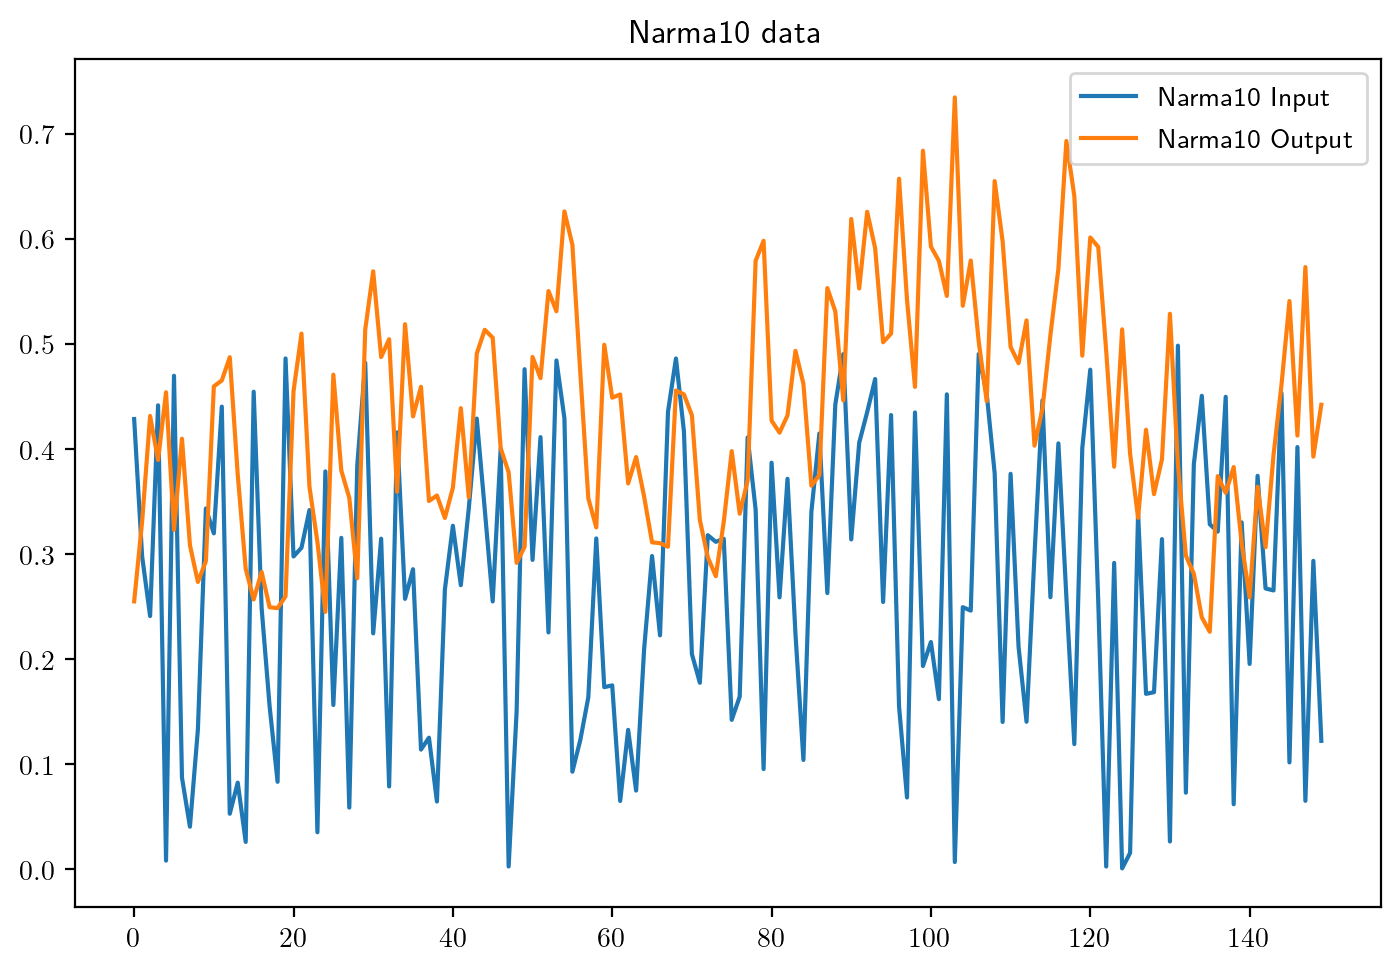

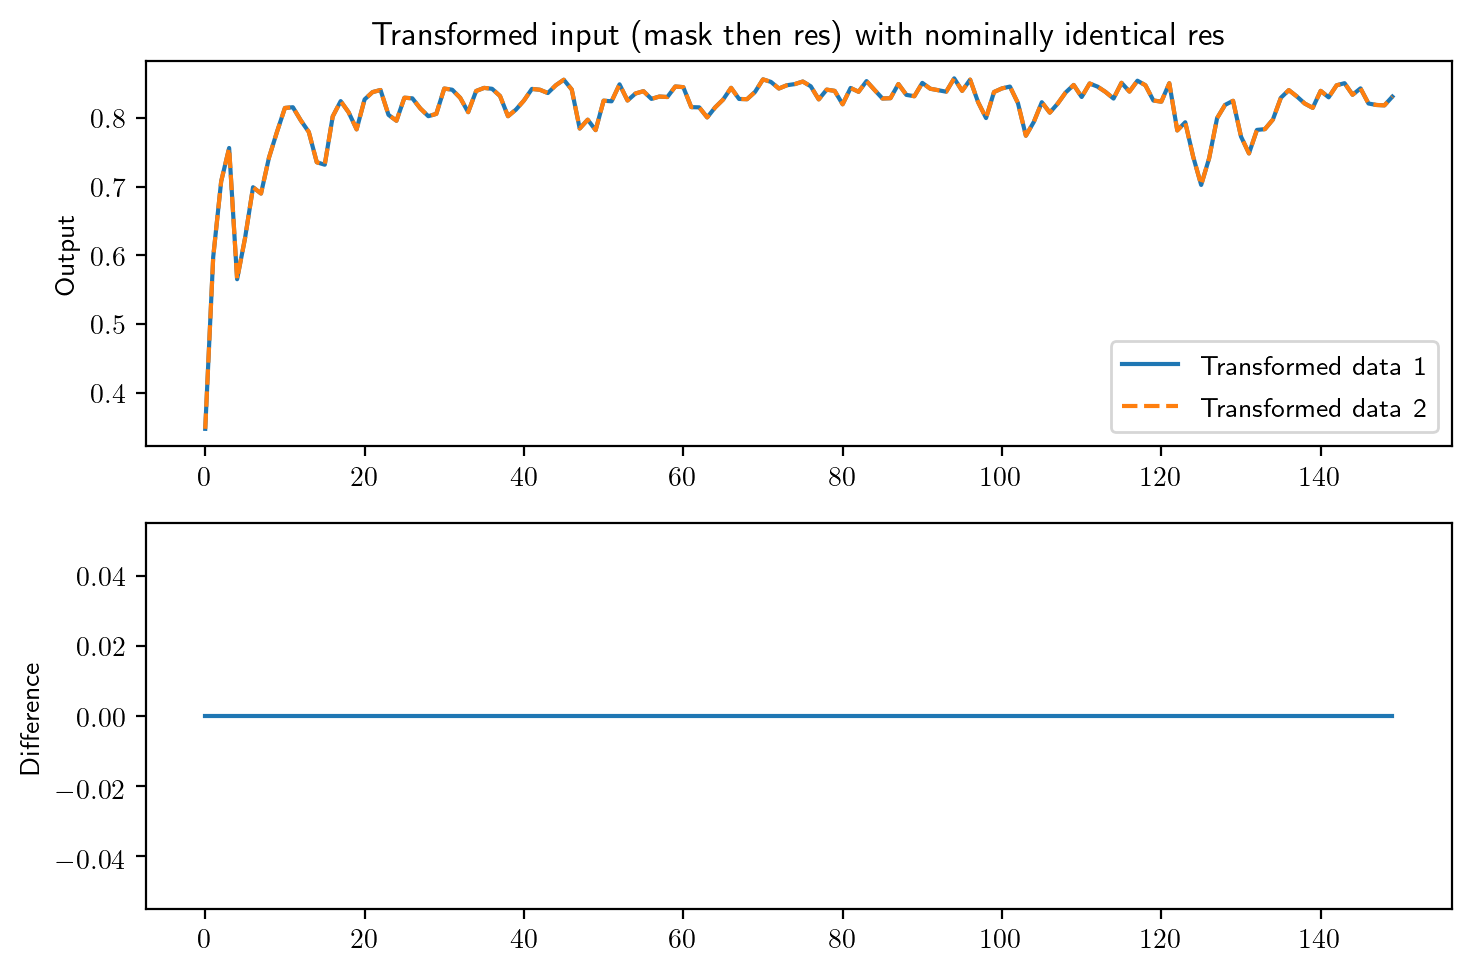

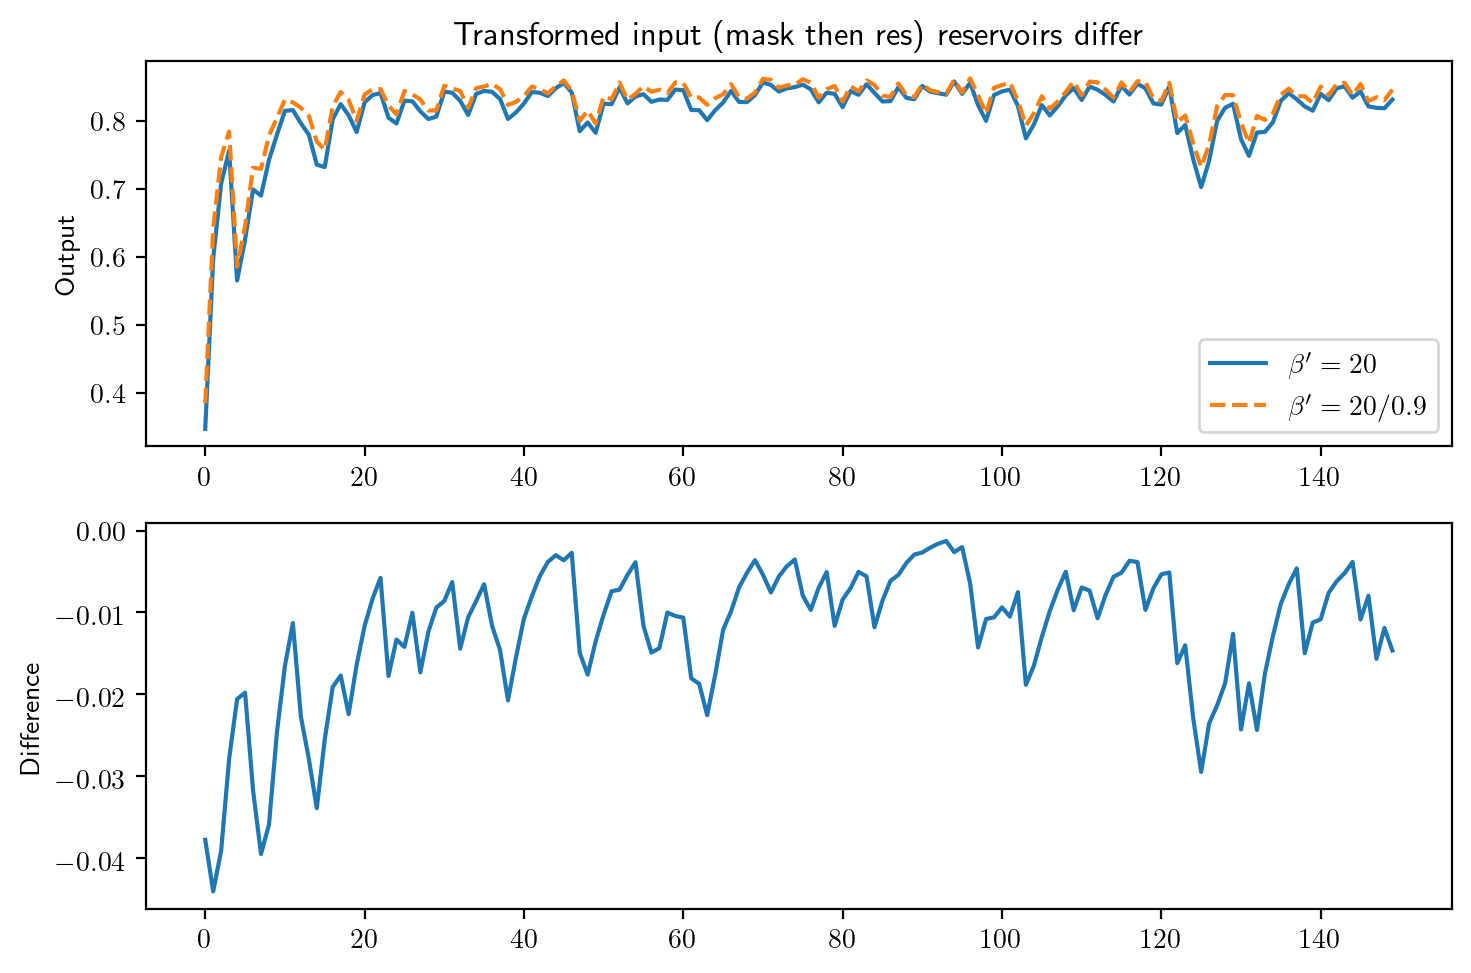

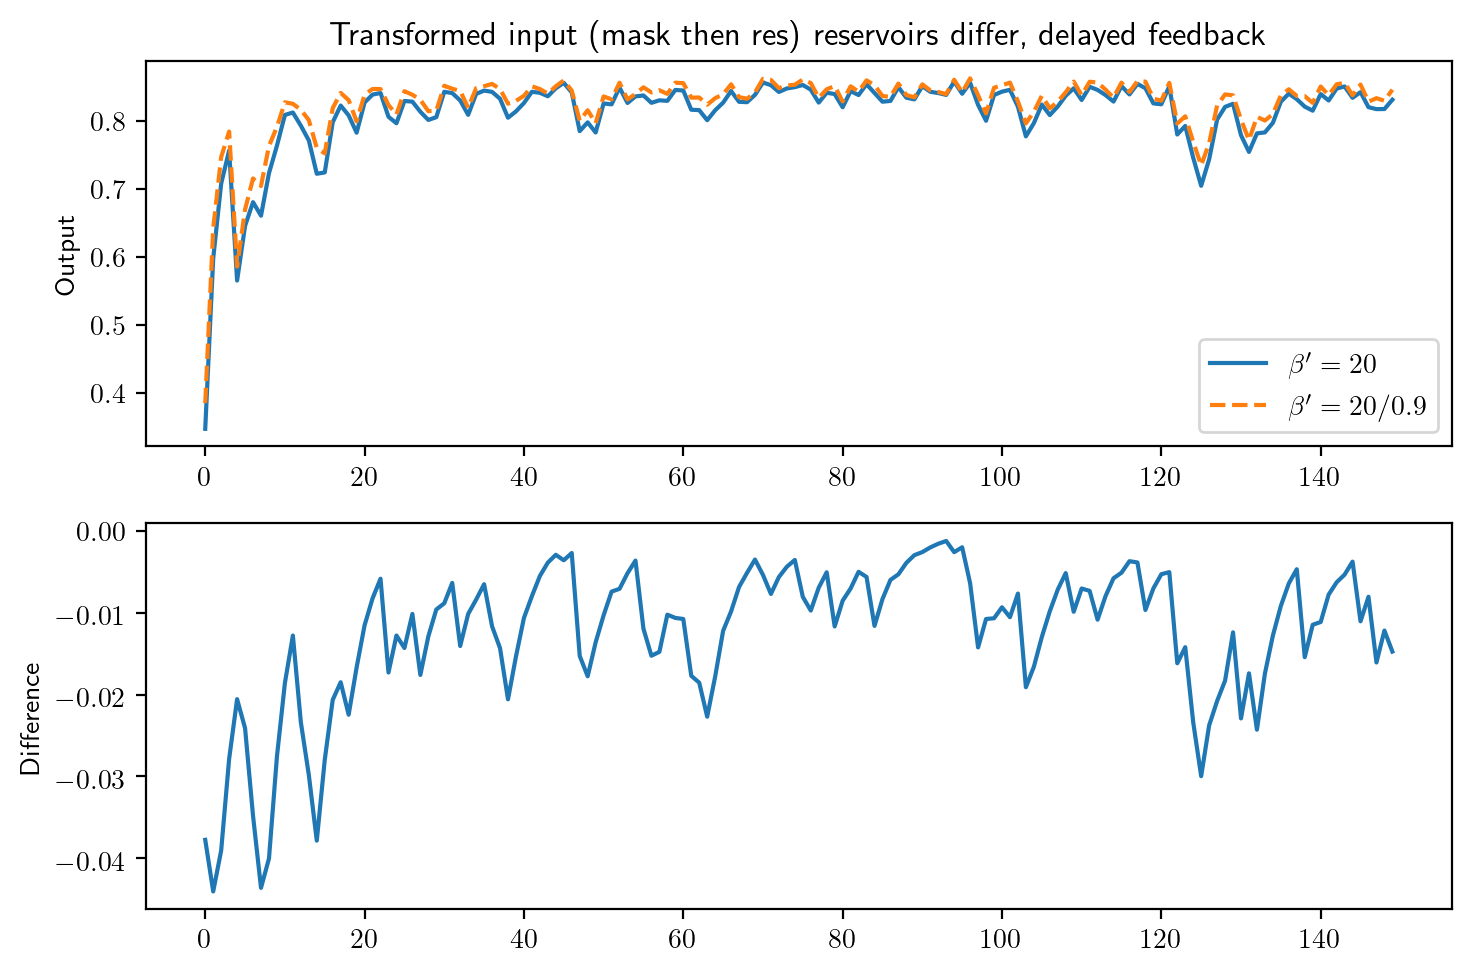

In [59]:
# Testing output properties

# Misc parameters
params = {'theta': 0.4, 'gamma' : 0.132,'delay_feedback' : 0,'Nvirt' : 5}
params2 = {'theta': 0.4, 'gamma' : 0.132,'delay_feedback' : 0,'Nvirt' : 5}
params3 = {'theta': 0.4, 'gamma' : 0.132,'delay_feedback' : 1,'Nvirt' : 5}
Ntrain = 100
Ntest = 50

print("seed NARMA: "+str(seed_NARMA))
u, d = NARMA10(Ntrain + Ntest,seed=seed_NARMA)

fig, ax = plt.subplots(1,figsize=[figurewidth,figureheight],dpi=200)
ax.plot(u)
ax.plot(d)
ax.legend(['Narma10 Input','Narma10 Output'])
ax.set_title('Narma10 data')

transform_1 = get_res(beta_prime=base_beta_prime)[1]
transform_2 = get_res(beta_prime=base_beta_prime)[1]
transform_3 = get_res(beta_prime=base_beta_prime/0.9)[1]

transform_4 = get_res(beta_prime=base_beta_prime)[1]
transform_5 = get_res(beta_prime=base_beta_prime/0.9)[1]

transformed_1 = transform_1(u,params)
transformed_2 = transform_2(u,params)
transformed_3 = transform_3(u,params)

transformed_4 = transform_4(u,params3)
transformed_5 = transform_5(u,params3)


fig,ax = plt.subplots(2,figsize=[figurewidth,figureheight],dpi=200)
ax[0].plot(transformed_1)
ax[0].plot(transformed_2,linestyle='dashed')
ax[0].set_title('Transformed input (mask then res) with nominally identical res')
ax[0].legend(['Transformed data 1','Transformed data 2'])
ax[0].set_ylabel('Output')
ax[1].plot(transformed_1-transformed_2)
ax[1].set_ylabel('Difference')

fig,ax = plt.subplots(2,figsize=[figurewidth,figureheight],dpi=200)
ax[0].plot(transformed_1)
ax[0].plot(transformed_3,linestyle='dashed')
ax[0].set_title('Transformed input (mask then res) reservoirs differ')
ax[0].legend([r"$\beta' = 20$",r"$\beta' = 20/0.9$"])
ax[0].set_ylabel('Output')
ax[1].plot(transformed_1-transformed_3)
ax[1].set_ylabel('Difference')

fig,ax = plt.subplots(2,figsize=[figurewidth,figureheight],dpi=200)
ax[0].plot(transformed_4)
ax[0].plot(transformed_5,linestyle='dashed')
ax[0].set_title('Transformed input (mask then res) reservoirs differ, delayed feedback')
ax[0].legend([r"$\beta' = 20$",r"$\beta' = 20/0.9$"])
ax[0].set_ylabel('Output')
ax[1].plot(transformed_4-transformed_5)
ax[1].set_ylabel('Difference')

x_train = u[:Ntrain]
y_train = d[:Ntrain]
x_test = u[Ntrain:]
y_test = d[Ntrain:]

print("Samples for training: ", len(x_train))
print("Samples for test: ", len(x_test))

# Net setup
Nin = x_train[0].shape[-1]
Nout = len(np.unique(y_train))

print( 'Nin =', Nin, ', Nout = ', Nout, ', Nvirt = ', Nvirt)

snr = single_node_reservoir(Nin, Nout, Nvirt, m0, res = transform)
net = linear(Nin, Nout, bias = bias)

Training and testing:

seed NARMA: 1234
Samples for training:  500
Samples for test:  250
Nin = 1 , Nout =  500 , Nvirt =  400
Using Nthreads =  1
Seed Training: 1234
l= 4.5399929762484854e-05 0.008225914517225165
l= 5.017468205617528e-05 0.00822561135648527
l= 5.5451599432176945e-05 0.008225304191536189
l= 6.128349505322202e-05 0.008224992677001752
l= 6.772873649085378e-05 0.008224676850237301
l= 7.485182988770046e-05 0.008224357170921081
l= 8.272406555663209e-05 0.008224034561019118
l= 9.142423147817311e-05 0.008223710442879
l= 0.00010103940183709307 0.008223386773551134
l= 0.00011166580849011438 0.008223066072125
l= 0.0001234098040866791 0.008222751437070618
l= 0.0001363889264820109 0.00822244655018681
l= 0.00015073307509547596 0.008222155663561631
l= 0.00016658581098763264 0.008221883566717953
l= 0.00018410579366757822 0.008221635531468607
l= 0.00020346836901064308 0.008221417233337514
l= 0.000224867324178847 0.008221234650045125
l= 0.0002485168271079505 0.008221093939501666
l= 0.0002746535699721406 0.00

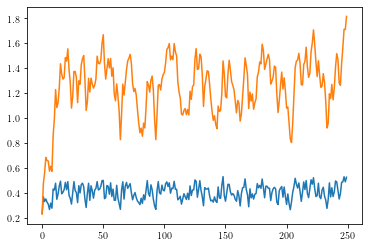

Error and NRMSE for normal testing 0.00628950041806659 0.8362276140103926
Error and NRMSE for higher temp testing 0.8148498707702768 9.518208854237395


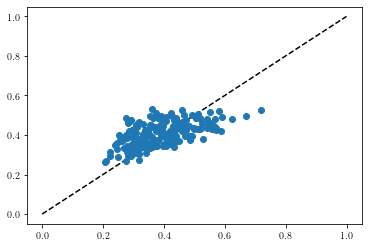

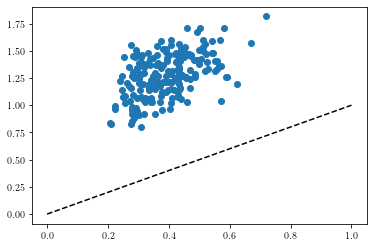

In [49]:
# Training at one temp, testing at another

# Misc parameters
params = {'theta': 0.4, 'gamma' : 0.132,'delay_feedback' : 0,'Nvirt' : 50}
Ntrain = 500
Ntest = 250
spacer = 50

print("seed NARMA: "+str(seed_NARMA))
u, d = NARMA10(Ntrain + Ntest,seed=seed_NARMA)


transform = get_res(beta_prime=base_beta_prime)[1]
transformhigher = get_res(beta_prime=base_beta_prime/0.9)[1]


x_train = u[:Ntrain]
y_train = d[:Ntrain]
x_test = u[Ntrain:]
y_test = d[Ntrain:]

print("Samples for training: ", len(x_train))
print("Samples for test: ", len(x_test))

# Net setup
Nin = x_train[0].shape[-1]
Nout = len(np.unique(y_train))

print( 'Nin =', Nin, ', Nout = ', Nout, ', Nvirt = ', Nvirt)

snr = single_node_reservoir(Nin, Nout, Nvirt, m0, res = transform)
net = linear(Nin, Nout, bias = bias)

# Training
S_train, J_train = snr.transform(x_train,params)
np.size(S_train)
seed_training = 1234
RR.Kfold_train(net,S_train,y_train,10, quiet = False)

# Testing
S_test, J_test = snr.transform(x_test,params)
#test with the other transform...
snr.res = transformhigher
S_test_higher, J_test_higher = snr.transform(x_test,params)


print("Spacer NRMSE:"+str(spacer))
pred = net.forward(S_test)
pred_higher = net.forward(S_test_higher)
plt.plot(pred)
plt.plot(pred_higher)
plt.show()
np.size(pred)
error = MSE(pred[spacer:], y_test[spacer:])
predNRMSE = NRMSE(pred[spacer:], y_test[spacer:])
print('Error and NRMSE for normal testing', error, predNRMSE)

error_higher = MSE(pred_higher[spacer:], y_test[spacer:])
predNRMSE_higher = NRMSE(pred_higher[spacer:], y_test[spacer:])
print('Error and NRMSE for higher temp testing', error_higher, predNRMSE_higher)

plt.plot( np.linspace(0.0,1.0), np.linspace(0.0,1.0),'k--')
plt.plot(y_test[spacer:],pred[spacer:],'o')
plt.show()

plt.plot( np.linspace(0.0,1.0), np.linspace(0.0,1.0),'k--')
plt.plot(y_test[spacer:],pred_higher[spacer:],'o')
plt.show()

seed NARMA: 1234
Samples for training:  50
Samples for test:  50
Nin = 1 , Nout =  50 , Nvirt =  400
Using Nthreads =  1
Seed Training: 1234
l= 4.5399929762484854e-05 0.008620626421619742
l= 5.017468205617528e-05 0.008627864200820146
l= 5.5451599432176945e-05 0.00863441524036482
l= 6.128349505322202e-05 0.008640340167976853
l= 6.772873649085378e-05 0.008645694226782154
l= 7.485182988770046e-05 0.008650527673649915
l= 8.272406555663209e-05 0.008654886154689925
l= 9.142423147817311e-05 0.008658811057109783
l= 0.00010103940183709307 0.008662339837154951
l= 0.00011166580849011438 0.008665506324210157
l= 0.0001234098040866791 0.00866834100151503
l= 0.0001363889264820109 0.008670871264121926
l= 0.00015073307509547596 0.008673121654924964
l= 0.00016658581098763264 0.008675114079666004
l= 0.00018410579366757822 0.008676868001909343
l= 0.00020346836901064308 0.008678400619008531
l= 0.000224867324178847 0.00867972702008962
l= 0.0002485168271079505 0.00868086032709543
l= 0.0002746535699721406 0.0

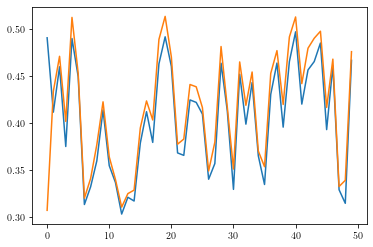

Error and NRMSE for normal testing 0.01095147228995827 0.988215836105556
Error and NRMSE for higher temp testing 0.010056163455176704 0.9469601791654989


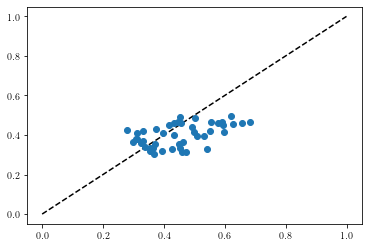

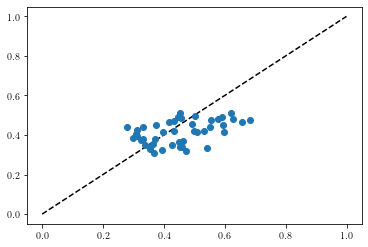

In [52]:
# Training at one temp, testing at another

# Misc parameters
params = {'theta': 0.4, 'gamma' : 0,'delay_feedback' : 0,'Nvirt' : 5}
Ntrain = 50
Ntest = 50
spacer = 5

print("seed NARMA: "+str(seed_NARMA))
u, d = NARMA10(Ntrain + Ntest,seed=seed_NARMA)


transform = get_res(beta_prime=base_beta_prime)[1]
transformhigher = get_res(beta_prime=base_beta_prime/1.01)[1]


x_train = u[:Ntrain]
y_train = d[:Ntrain]
x_test = u[Ntrain:]
y_test = d[Ntrain:]

print("Samples for training: ", len(x_train))
print("Samples for test: ", len(x_test))

# Net setup
Nin = x_train[0].shape[-1]
Nout = len(np.unique(y_train))

print( 'Nin =', Nin, ', Nout = ', Nout, ', Nvirt = ', Nvirt)

snr = single_node_reservoir(Nin, Nout, Nvirt, m0, res = transform)
net = linear(Nin, Nout, bias = bias)

# Training
S_train, J_train = snr.transform(x_train,params)
np.size(S_train)
seed_training = 1234
RR.Kfold_train(net,S_train,y_train,10, quiet = False)

# Testing
S_test, J_test = snr.transform(x_test,params)
#test with the other transform...
snr.res = transformhigher
S_test_higher, J_test_higher = snr.transform(x_test,params)


print("Spacer NRMSE:"+str(spacer))
pred = net.forward(S_test)
pred_higher = net.forward(S_test_higher)
plt.plot(pred)
plt.plot(pred_higher)
plt.show()
np.size(pred)
error = MSE(pred[spacer:], y_test[spacer:])
predNRMSE = NRMSE(pred[spacer:], y_test[spacer:])
print('Error and NRMSE for normal testing', error, predNRMSE)

error_higher = MSE(pred_higher[spacer:], y_test[spacer:])
predNRMSE_higher = NRMSE(pred_higher[spacer:], y_test[spacer:])
print('Error and NRMSE for higher temp testing', error_higher, predNRMSE_higher)

plt.plot( np.linspace(0.0,1.0), np.linspace(0.0,1.0),'k--')
plt.plot(y_test[spacer:],pred[spacer:],'o')
plt.show()

plt.plot( np.linspace(0.0,1.0), np.linspace(0.0,1.0),'k--')
plt.plot(y_test[spacer:],pred_higher[spacer:],'o')
plt.show()

seed NARMA: 1234
Samples for training:  50
Samples for test:  50
Nin = 1 , Nout =  50 , Nvirt =  400
Using Nthreads =  1
Seed Training: 1234
l= 4.5399929762484854e-05 0.006659694518410067
l= 5.017468205617528e-05 0.00677701353854881
l= 5.5451599432176945e-05 0.006892409057620138
l= 6.128349505322202e-05 0.007005235274930627
l= 6.772873649085378e-05 0.007114923449194241
l= 7.485182988770046e-05 0.007220987449017319
l= 8.272406555663209e-05 0.0073230260634626135
l= 9.142423147817311e-05 0.007420722425771545
l= 0.00010103940183709307 0.007513840999678227
l= 0.00011166580849011438 0.007602222626933218
l= 0.0001234098040866791 0.007685778141784854
l= 0.0001363889264820109 0.007764481033312981
l= 0.00015073307509547596 0.007838359587498641
l= 0.00016658581098763264 0.0079074888779488
l= 0.00018410579366757822 0.007971982904453672
l= 0.00020346836901064308 0.00803198710894202
l= 0.000224867324178847 0.008087671432846406
l= 0.0002485168271079505 0.008139224022019982
l= 0.0002746535699721406 0.

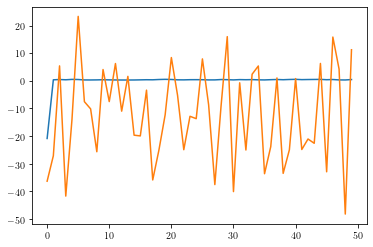

Error and NRMSE for normal testing 0.010158520565467875 0.9517673160265665
Error and NRMSE for higher temp testing 422.1570119018332 194.02270649606962


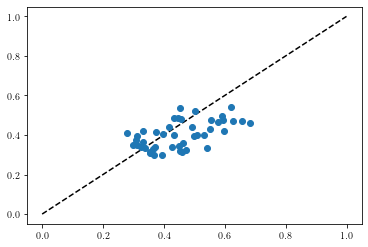

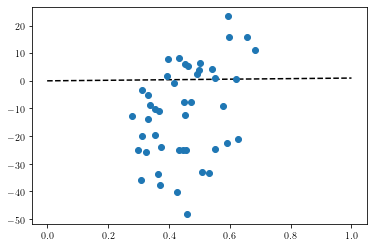

In [60]:
# Training at one temp, testing at another

# Misc parameters
params = {'theta': 0.4, 'gamma' : 0.132,'delay_feedback' : 1,'Nvirt' : 5}
Ntrain = 50
Ntest = 50
spacer = 5

print("seed NARMA: "+str(seed_NARMA))
u, d = NARMA10(Ntrain + Ntest,seed=seed_NARMA)


transform = get_res(beta_prime=base_beta_prime)[1]
transformhigher = get_res(beta_prime=base_beta_prime/1.01)[1]


x_train = u[:Ntrain]
y_train = d[:Ntrain]
x_test = u[Ntrain:]
y_test = d[Ntrain:]

print("Samples for training: ", len(x_train))
print("Samples for test: ", len(x_test))

# Net setup
Nin = x_train[0].shape[-1]
Nout = len(np.unique(y_train))

print( 'Nin =', Nin, ', Nout = ', Nout, ', Nvirt = ', Nvirt)

snr = single_node_reservoir(Nin, Nout, Nvirt, m0, res = transform)
net = linear(Nin, Nout, bias = bias)

# Training
S_train, J_train = snr.transform(x_train,params)
np.size(S_train)
seed_training = 1234
RR.Kfold_train(net,S_train,y_train,10, quiet = False)

# Testing
S_test, J_test = snr.transform(x_test,params)
#test with the other transform...
snr.res = transformhigher
S_test_higher, J_test_higher = snr.transform(x_test,params)


print("Spacer NRMSE:"+str(spacer))
pred = net.forward(S_test)
pred_higher = net.forward(S_test_higher)
plt.plot(pred)
plt.plot(pred_higher)
plt.show()
np.size(pred)
error = MSE(pred[spacer:], y_test[spacer:])
predNRMSE = NRMSE(pred[spacer:], y_test[spacer:])
print('Error and NRMSE for normal testing', error, predNRMSE)

error_higher = MSE(pred_higher[spacer:], y_test[spacer:])
predNRMSE_higher = NRMSE(pred_higher[spacer:], y_test[spacer:])
print('Error and NRMSE for higher temp testing', error_higher, predNRMSE_higher)

plt.plot( np.linspace(0.0,1.0), np.linspace(0.0,1.0),'k--')
plt.plot(y_test[spacer:],pred[spacer:],'o')
plt.show()

plt.plot( np.linspace(0.0,1.0), np.linspace(0.0,1.0),'k--')
plt.plot(y_test[spacer:],pred_higher[spacer:],'o')
plt.show()

### Examining differences between fast (interpolated) and slow evolver

We've seen some difference in performance between the fast and slow evolver. This is trying to explore the origin.

No such repository: machine_learning_library, on path: C:\Users\Alexander\Desktop\Stage_3A\ML_library
seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  400
Deterministic mask will be used
1234
Using Nthreads =  1
{'theta': 0.3333333333333333, 'gamma': 0.25, 'delay_feedback': 0, 'Nvirt': 400}
[ 0.00339047 -0.00046543 -0.0042186  ...  0.01314426  0.01170859
  0.01007173]
Seed Training: 1234
Using Nthreads =  1
{'theta': 0.3333333333333333, 'gamma': 0.25, 'delay_feedback': 0, 'Nvirt': 400}
[ 0.01050592  0.00474322 -0.00028625 ...  0.01175652  0.0102936
  0.00824508]
Spacer NRMSE:0
0.004869030629646495 0.6305248512425984


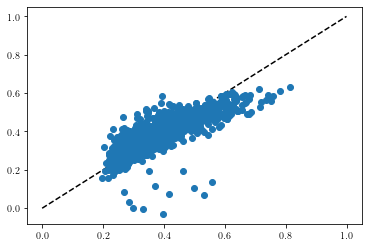

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  400
Deterministic mask will be used
1234
Using Nthreads =  1
{'theta': 0.3333333333333333, 'gamma': 0.25, 'delay_feedback': 0, 'Nvirt': 400}
[ 0.00942614  0.00386935 -0.00111161 ...  0.01303326  0.01170613
  0.00994221]
Seed Training: 1234
Using Nthreads =  1
{'theta': 0.3333333333333333, 'gamma': 0.25, 'delay_feedback': 0, 'Nvirt': 400}
[ 0.01050117  0.00480686 -0.00021483 ...  0.01180701  0.01021084
  0.00825963]
Spacer NRMSE:0
0.004327465078122362 0.5944259232614756


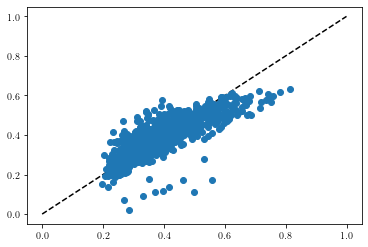

In [3]:
import spnc_ml as ml

# NARMA parameters
Ntrain = 2000
Ntest = 1000

# Net Parameters
Nvirt = 400
m0 = 1e-2
bias = True

# Resevoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 10
params = {'theta': 1/3,'gamma' : .25,'delay_feedback' : 0,'Nvirt' : Nvirt}
spn = spnc.spnc_anisotropy(h,theta_H,k_s_0,phi,beta_prime)
transforms = spn.gen_signal_slow_delayed_feedback
transformf = spn.gen_signal_fast_delayed_feedback

# DO IT
(y_test_s,y_pred_s)=ml.spnc_narma10(Ntrain, Ntest, Nvirt, m0, bias, transforms, params, seed_NARMA=1234,fixed_mask=True, return_outputs=True)

# DO IT
(y_test_f,y_pred_f)=ml.spnc_narma10(Ntrain, Ntest, Nvirt, m0, bias, transformf, params, seed_NARMA=1234,fixed_mask=True, return_outputs=True)

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  400
Deterministic mask will be used
1234
Using Nthreads =  1
{'theta': 0.3333333333333333, 'gamma': 0.25, 'delay_feedback': 0, 'Nvirt': 400}
[ 0.00339047 -0.00046543 -0.0042186  ...  0.01314426  0.01170859
  0.01007173]
Seed Training: 1234
Using Nthreads =  1
{'theta': 0.3333333333333333, 'gamma': 0.25, 'delay_feedback': 0, 'Nvirt': 400}
[ 0.01050592  0.00474322 -0.00028625 ...  0.01175652  0.0102936
  0.00824508]
Spacer NRMSE:0
0.004869030629646495 0.6305248512425984


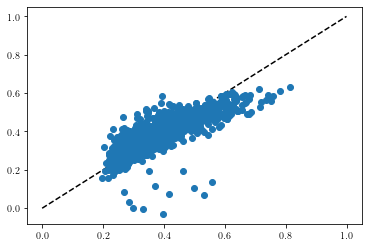

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  400
Deterministic mask will be used
1234
Using Nthreads =  1
{'theta': 0.3333333333333333, 'gamma': 0.25, 'delay_feedback': 0, 'Nvirt': 400}
[ 0.00338392 -0.00046056 -0.0042141  ...  0.01303326  0.01170613
  0.00994221]
Seed Training: 1234
Using Nthreads =  1
{'theta': 0.3333333333333333, 'gamma': 0.25, 'delay_feedback': 0, 'Nvirt': 400}
[ 0.01050117  0.00480685 -0.00021484 ...  0.01180701  0.01021084
  0.00825962]
Spacer NRMSE:0
4.844389054646589 19.88842821671205


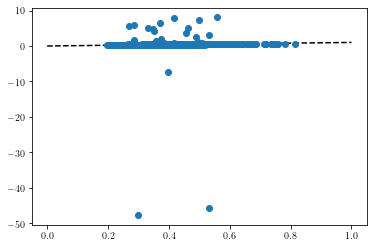

In [4]:
import spnc_ml as ml

# NARMA parameters
Ntrain = 2000
Ntest = 1000

# Net Parameters
Nvirt = 400
m0 = 1e-2
bias = True

# Resevoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 10
params = {'theta': 1/3,'gamma' : .25,'delay_feedback' : 0,'Nvirt' : Nvirt}


spn = spnc.spnc_anisotropy(h,theta_H,k_s_0,phi,beta_prime)
transforms = spn.gen_signal_slow_delayed_feedback

# DO IT
(y_test_s,y_pred_s)=ml.spnc_narma10(Ntrain, Ntest, Nvirt, m0, bias, transforms, params, seed_NARMA=1234,fixed_mask=True, return_outputs=True)


spn = spnc.spnc_anisotropy(h,theta_H,k_s_0,phi,beta_prime)
transformf = spn.gen_signal_fast_delayed_feedback

# DO IT
(y_test_f,y_pred_f)=ml.spnc_narma10(Ntrain, Ntest, Nvirt, m0, bias, transformf, params, seed_NARMA=1234,fixed_mask=True, return_outputs=True)

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  400
Deterministic mask will be used
1234
Using Nthreads =  1
{'theta': 0.3333333333333333, 'gamma': 0.25, 'delay_feedback': 0, 'Nvirt': 400}
[ 0.00338392 -0.00046056 -0.0042141  ...  0.01303326  0.01170613
  0.00994221]
Seed Training: 1234
Using Nthreads =  1
{'theta': 0.3333333333333333, 'gamma': 0.25, 'delay_feedback': 0, 'Nvirt': 400}
[ 0.01050117  0.00480685 -0.00021484 ...  0.01180701  0.01021084
  0.00825962]
Spacer NRMSE:0
4.844389054646589 19.88842821671205


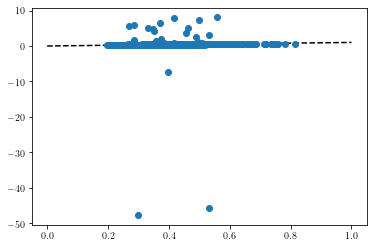

NameError: name 'NRMSE_list' is not defined

In [5]:
# NARMA parameters
Ntrain = 2000
Ntest = 1000

# Net Parameters
Nvirt = 400
m0 = 1e-2
bias = True

# Resevoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 10
params = {'theta': 1/3,'gamma' : .25,'delay_feedback' : 0,'Nvirt' : Nvirt}
spn = spnc.spnc_anisotropy(h,theta_H,k_s_0,phi,beta_prime)
transformf = spn.gen_signal_fast_delayed_feedback

# DO IT
(y_test_f,y_pred_f)=ml.spnc_narma10(Ntrain, Ntest, Nvirt, m0, bias, transformf, params, seed_NARMA=1234,fixed_mask=True, return_outputs=True)

spac = 50
NRMSE_list(y_test_f[spac:],y_pred_f[spac:])

In [6]:
def NRMSE(Y,Y_pred):
    var = np.var(Y)
    return np.sqrt(np.square(Y_pred-Y).mean()/var)

def NRMSE_list(y,y_pred):
    Y = np.array(y)
    Y_pred = np.array(y_pred)
    return(NRMSE(Y,Y_pred))

0.550198675967094
0.47028905308311103


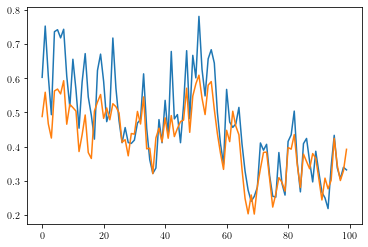

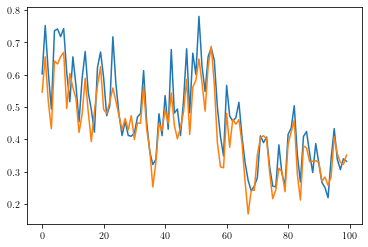

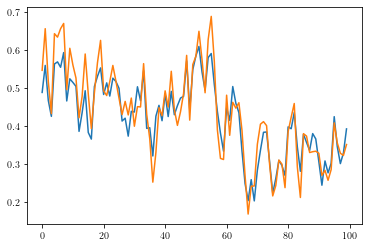

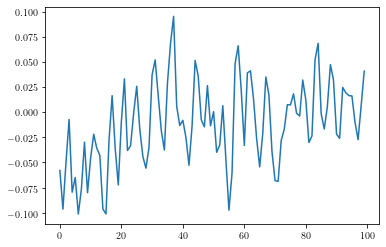

In [7]:
spac = 50
window = 100

plt.figure()
plt.plot(y_test_s[spac:spac+window])
plt.plot(y_pred_s[spac:spac+window])

plt.figure()
plt.plot(y_test_f[spac:spac+window])
plt.plot(y_pred_f[spac:spac+window])

plt.figure()
plt.plot(y_pred_s[spac:spac+window])
plt.plot(y_pred_f[spac:spac+window])

plt.figure()
plt.plot(y_pred_s[spac:spac+window]-y_pred_f[spac:spac+window])

print(NRMSE_list(y_test_s[spac:],y_pred_s[spac:]))
print(NRMSE_list(y_test_f[spac:],y_pred_f[spac:]))

NRMSE between fast and slow :  0.02738598037179268


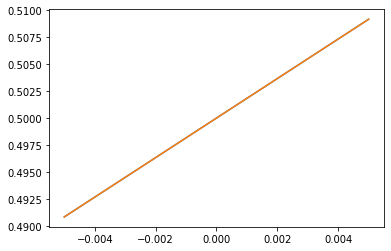

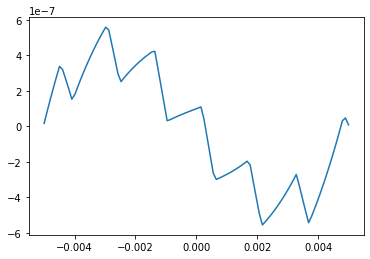

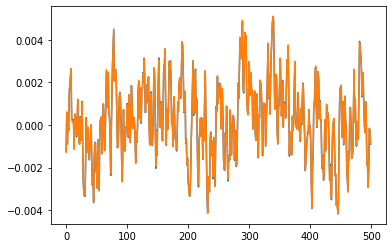

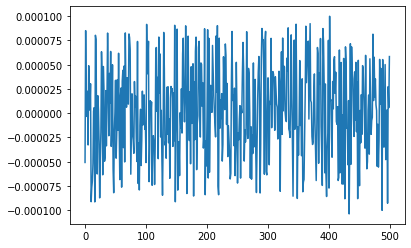

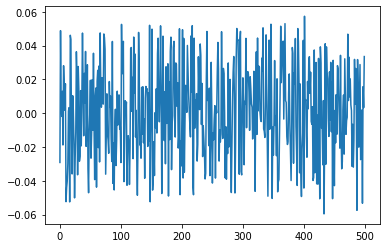

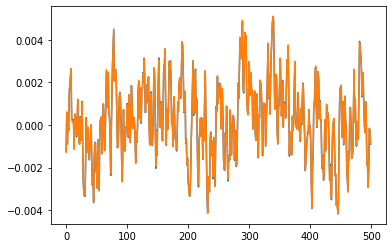

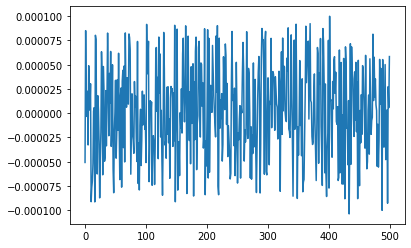

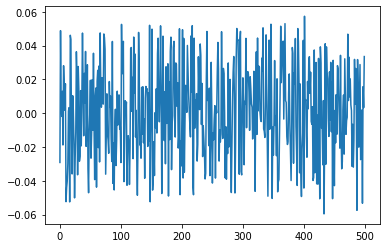

In [7]:
import numpy as np
from spnc import spnc_anisotropy
import matplotlib.pyplot as plt
from spnc import calculate_energy_barriers

def NRMSE(Y,Y_pred):
    var = np.var(Y)
    return np.sqrt(np.square(Y_pred-Y).mean()/var)

def NRMSE_list(y,y_pred):
    Y = np.array(y)
    Y_pred = np.array(y_pred)
    return(NRMSE(Y,Y_pred))

# Resevoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 10

k_s_mag = 0.005

k_s = np.linspace(-k_s_mag,k_s_mag,100)
sp = spnc_anisotropy(h,theta_H,k_s_0,phi,beta_prime)
sp.interdensity = 100
sp.minirestart()
plt.plot(k_s,sp.f_p1_eq(k_s))
p1s = np.zeros(np.shape(k_s))
for i,k in enumerate(k_s):
    sp.k_s = k
    calculate_energy_barriers(sp)
    sp.p1 = sp.get_p1_eq()
    sp.p2 = sp.get_p2_eq()
    p1s[i] = sp.p1
plt.plot(k_s,p1s)
plt.figure()
plt.plot(k_s,sp.f_p1_eq(k_s)-p1s)


k_s = (np.random.random(500)-0.5)*k_s_mag

params = {'theta': 1/3,'gamma' : .25,'delay_feedback' : 0,'Nvirt' : 400}

sps = spnc_anisotropy(h,theta_H,k_s_0,phi,beta_prime)
ms = sps.gen_signal_slow_delayed_feedback(k_s,params)

spf = spnc_anisotropy(h,theta_H,k_s_0,phi,beta_prime)
mf = spf.gen_signal_fast_delayed_feedback(k_s,params)

plt.figure()
plt.plot(ms[-500:])
plt.plot(mf[-500:])
plt.figure()
plt.plot(mf[-500:]-ms[-500:])
plt.figure()
plt.plot((mf[-500:]-ms[-500:])/np.std(ms[-500:]))

plt.figure()
plt.plot(ms[:500])
plt.plot(mf[:500])
plt.figure()
plt.plot(mf[:500]-ms[:500])
plt.figure()
plt.plot((mf[:500]-ms[:500])/np.std(ms[:500]))

print('NRMSE between fast and slow : ',NRMSE_list(mf,ms))

No such repository: machine_learning_library, on path: C:\Users\Alexander\Desktop\Stage_3A\ML_library
seed NARMA: 1234
Samples for training:  200
Samples for test:  100
Nin = 1 , Nout =  200 , Nvirt =  40
Deterministic mask will be used
1234
Using Nthreads =  1
Seed Training: 1234
Using Nthreads =  1
Spacer NRMSE:0
0.006944081530640355 0.7026980113063972


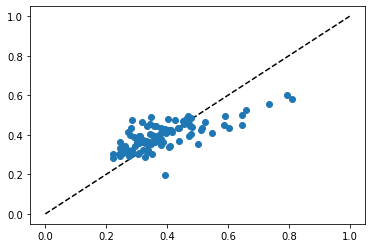

seed NARMA: 1234
Samples for training:  200
Samples for test:  100
Nin = 1 , Nout =  200 , Nvirt =  40
Deterministic mask will be used
1234
Using Nthreads =  1
Seed Training: 1234
Using Nthreads =  1
Spacer NRMSE:0
102.26263713369184 85.2746239393599


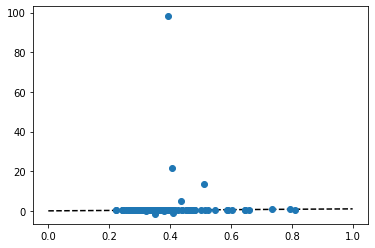

In [3]:
import spnc_ml as ml

# NARMA parameters
Ntrain = 200
Ntest = 100

# Net Parameters
Nvirt = 40
m0 = 1e-2
bias = True

# Resevoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 10
params = {'theta': 1/3,'gamma' : .25,'delay_feedback' : 0,'Nvirt' : Nvirt}


spn = spnc.spnc_anisotropy(h,theta_H,k_s_0,phi,beta_prime)
transforms = spn.gen_signal_slow_delayed_feedback



# DO IT
(y_test_s,y_pred_s)=ml.spnc_narma10(Ntrain, Ntest, Nvirt, m0, bias, transforms, params, seed_NARMA=1234,fixed_mask=True, return_outputs=True)


spn = spnc.spnc_anisotropy(h,theta_H,k_s_0,phi,beta_prime)
transformf = spn.gen_signal_fast_delayed_feedback

# DO IT
(y_test_f,y_pred_f)=ml.spnc_narma10(Ntrain, Ntest, Nvirt, m0, bias, transformf, params, seed_NARMA=1234,fixed_mask=True, return_outputs=True)

seed NARMA: 1234
Samples for training:  200
Samples for test:  100
Nin = 1 , Nout =  200 , Nvirt =  40
Deterministic mask will be used
1234
Using Nthreads =  1
Seed Training: 1234
Using Nthreads =  1
Spacer NRMSE:0
0.006944081530640355 0.7026980113063972


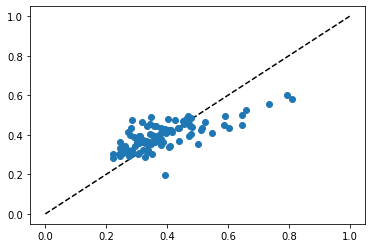

seed NARMA: 1234
Samples for training:  200
Samples for test:  100
Nin = 1 , Nout =  200 , Nvirt =  40
Deterministic mask will be used
1234
Using Nthreads =  1
Seed Training: 1234
Using Nthreads =  1
Spacer NRMSE:0
102.26263713369184 85.2746239393599


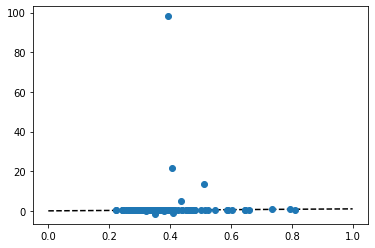

seed NARMA: 1234
Samples for training:  200
Samples for test:  100
Nin = 1 , Nout =  200 , Nvirt =  40
Deterministic mask will be used
1234
Using Nthreads =  1
Seed Training: 1234
Using Nthreads =  1
Spacer NRMSE:0
0.006782206972406635 0.6944593640965319


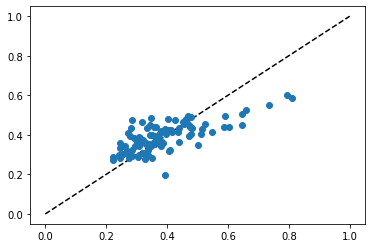

In [50]:
import spnc_ml as ml

# NARMA parameters
Ntrain = 200
Ntest = 100
spacer = 0

# Net Parameters
Nvirt = 40
m0 = 1e-2
bias = True

# Resevoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 10
params = {'theta': 1/3,'gamma' : .25,'delay_feedback' : 0,'Nvirt' : Nvirt}

def get_ress(h=0.4,theta_H=90,k_s_0=0,phi=45,beta_prime=20):
    res = spnc.spnc_anisotropy(h,theta_H,k_s_0,phi,beta_prime)
    transform = res.gen_signal_slow_delayed_feedback

    return res, transform

def get_resf(h=0.4,theta_H=90,k_s_0=0,phi=45,beta_prime=20):
    res = spnc.spnc_anisotropy(h,theta_H,k_s_0,phi,beta_prime)
    transform = res.gen_signal_fast_delayed_feedback

    return res, transform

spns, transforms = get_ress(h,theta_H,k_s_0,phi,beta_prime)

spnf, transformf = get_resf(h,theta_H,k_s_0,phi,beta_prime)

# DO IT
(y_test_s,y_pred_s)=ml.spnc_narma10(Ntrain, Ntest, Nvirt, m0, bias, transforms, params, seed_NARMA=1234,fixed_mask=True, return_outputs=True,spacer_NRMSE = spacer)

# DO IT
(y_test_f,y_pred_f)=ml.spnc_narma10(Ntrain, Ntest, Nvirt, m0, bias, transformf, params, seed_NARMA=1234,fixed_mask=True, return_outputs=True,spacer_NRMSE = spacer)

# DO IT
(y_test_f,y_pred_f)=ml.spnc_narma10(Ntrain, Ntest, Nvirt, m0, bias, transformf, params, seed_NARMA=1234,fixed_mask=True, return_outputs=True,spacer_NRMSE = spacer)



In [101]:

k_s = (np.random.random(50)-0.5)*k_s_mag

params = {'theta': 1/3,'gamma' : .25,'delay_feedback' : 0,'Nvirt' : 400}

spns, transforms = get_ress(h,theta_H,k_s_0,phi,beta_prime)

spnf, transformf = get_resf(h,theta_H,k_s_0,phi,beta_prime)

ms = transforms(k_s,params)

mf = transformf(k_s,params)

plt.figure()
plt.plot(ms[-500:])
plt.plot(mf[-500:])
plt.figure()
plt.plot(mf[-500:]-ms[-500:])
plt.figure()
plt.plot((mf[-500:]-ms[-500:])/np.std(ms[-500:]))

plt.figure()
plt.plot(ms[:50])
plt.plot(mf[:50])
plt.figure()
plt.plot(mf[:50]-ms[:50])
plt.figure()
plt.plot((mf[:50]-ms[:50])/np.std(ms[:50]))

print('NRMSE between fast and slow : ',NRMSE_list(mf,ms))

NameError: name 'k_s_mag' is not defined

## Do the ML in line

Imports

In [1]:
"""
Import handeling and Dependancy info

Local Dependancies
------------------
machine_learning_library  : v0.1.2
    This repository will need to be on your path in order to work.
    This is achieved with repo_tools module and a path find function
    Add to the searchpath and repos tuples if required


"""

import numpy as np
import matplotlib.pyplot as plt

# Sort out relative paths
import sys
from pathlib import Path
repodir = Path('..').resolve()
try:
    sys.path.index(str(repodir))
except ValueError:
    sys.path.append(str(repodir))

#tuple of Path variables
searchpaths = (Path.home() / 'repos', )
#tuple of repos
repos = ('machine_learning_library',)

# local imports
from SPNC import spnc
#ML specific
from SPNC.deterministic_mask import fixed_seed_mask, max_sequences_mask
import SPNC.repo_tools
SPNC.repo_tools.repos_path_finder(searchpaths, repos) #find ml library
from single_node_res import single_node_reservoir
import ridge_regression as RR
from linear_layer import *
from mask import binary_mask
from utility import *
from NARMA10 import NARMA10
from sklearn.metrics import classification_report

In [2]:

#tuple of Path variables
searchpaths = (Path.home() / 'repos', Path.home() / 'Desktop' / 'Stage_3A' / 'ML_library')
#tuple of repos
repos = ('machine_learning_library',)


# Add local modules and paths to local repos
from deterministic_mask import fixed_seed_mask, max_sequences_mask
import repo_tools
repo_tools.repos_path_finder(searchpaths, repos)
from single_node_res import single_node_reservoir
import ridge_regression as RR
from linear_layer import *
from mask import binary_mask
from utility import *
from NARMA10 import NARMA10
from datasets.load_TI46_digits import *
import datasets.load_TI46 as TI46
from sklearn.metrics import classification_report

No such repository: machine_learning_library, on path: C:\Users\Alexander\Desktop\Stage_3A\ML_library


Parameters and reservoirs

In [3]:
# NARMA parameters
Ntrain = 20
Ntest = 10

# Net Parameters
Nvirt = 4
m0 = 1e-2
bias = True

# Resevoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 10
params = {'theta': 1/3,'gamma' : .25,'delay_feedback' : 0,'Nvirt' : Nvirt}

def get_ress(h=0.4,theta_H=90,k_s_0=0,phi=45,beta_prime=20):
    res = spnc.spnc_anisotropy(h,theta_H,k_s_0,phi,beta_prime)
    transform = res.gen_signal_slow_delayed_feedback

    return res, transform

def get_resf(h=0.4,theta_H=90,k_s_0=0,phi=45,beta_prime=20):
    res = spnc.spnc_anisotropy(h,theta_H,k_s_0,phi,beta_prime)
    transform = res.gen_signal_fast_delayed_feedback

    return res, transform

spns, transforms = get_ress(h,theta_H,k_s_0,phi,beta_prime)

spnf, transformf = get_resf(h,theta_H,k_s_0,phi,beta_prime)

seed_NARMA=1234
seed = seed_NARMA
seed_mask = seed_NARMA
seed_training =seed
fixed_mask=True
return_outputs=True




{'theta': 0.3333333333333333, 'gamma': 0.25, 'delay_feedback': 0, 'Nvirt': 4}
NRMSE between fast and slow :  0.17737285243244763


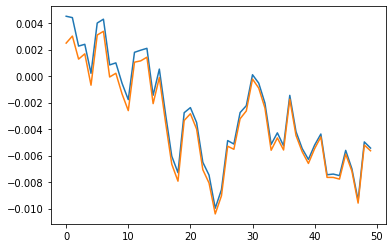

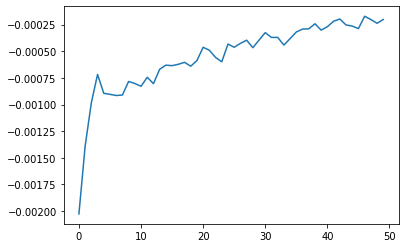

In [76]:
def NRMSE(Y,Y_pred):
    var = np.var(Y)
    return np.sqrt(np.square(Y_pred-Y).mean()/var)

def NRMSE_list(y,y_pred):
    Y = np.array(y)
    Y_pred = np.array(y_pred)
    return(NRMSE(Y,Y_pred))

k_s = (np.random.random(50)-0.5)*m0

print(params)

ms = transforms(k_s,params)

mf = transformf(k_s,params)

plt.figure()
plt.plot(ms)
plt.plot(mf)
plt.figure()
plt.plot(mf-ms)

print('NRMSE between fast and slow : ',NRMSE_list(mf,ms))

Narma data and net parameters

In [5]:
print("seed NARMA: "+str(seed_NARMA))
u, d = NARMA10(Ntrain + Ntest,seed=seed_NARMA)

x_train = u[:Ntrain]
y_train = d[:Ntrain]
x_test = u[Ntrain:]
y_test = d[Ntrain:]

print("Samples for training: ", len(x_train))
print("Samples for test: ", len(x_test))

# Net setup
Nin = x_train[0].shape[-1]
Nout = len(np.unique(y_train))

print( 'Nin =', Nin, ', Nout = ', Nout, ', Nvirt = ', Nvirt)

seed NARMA: 1234
Samples for training:  20
Samples for test:  10
Nin = 1 , Nout =  20 , Nvirt =  4


Make nets and SNRs

In [6]:
snrs = single_node_reservoir(Nin, Nout, Nvirt, m0, res = transforms)
nets = linear(Nin, Nout, bias = bias)

snrf = single_node_reservoir(Nin, Nout, Nvirt, m0, res = transformf)
netf = linear(Nin, Nout, bias = bias)

if fixed_mask==True:
    print("Deterministic mask will be used")
    if seed_mask>=0:
        print(seed_mask)
        snrs.M = fixed_seed_mask(Nin, Nvirt, m0, seed=seed_mask)
        snrf.M = fixed_seed_mask(Nin, Nvirt, m0, seed=seed_mask)
    else:
        print("Max_sequences mask will be used")
        snr.M = max_sequences_mask(Nin, Nvirt, m0)

Deterministic mask will be used
1234


Training

In [11]:
# Training
S_trains, J_trains = snrs.transform(x_train,params)
np.size(S_trains)
RR.Kfold_train(nets,S_trains,y_train,10, quiet = False, seed_training=seed_training)

# # Training
# S_trainf, J_trainf = snrf.transform(x_train,params)
# np.size(S_trainf)
# RR.Kfold_train(netf,S_trainf,y_train,10, quiet = False, seed_training=seed_training)

Using Nthreads =  1
{'theta': 0.3333333333333333, 'gamma': 0.25, 'delay_feedback': 0, 'Nvirt': 4}
[-0.01271248 -0.01200198 -0.0124848  -0.01283077 -0.00981754 -0.01182926
 -0.01389443 -0.01554483 -0.01188278 -0.01285488 -0.01445481 -0.01596319
 -0.01101567 -0.01370395 -0.01709126 -0.01987718 -0.01728931 -0.01548252
 -0.01495403 -0.01520737 -0.011186   -0.01481005 -0.01827045 -0.02081019
 -0.01737416 -0.01621595 -0.01656974 -0.01717651 -0.01625725 -0.0156083
 -0.01519657 -0.01513404 -0.01358889 -0.01422238 -0.01484684 -0.01527941
 -0.01143532 -0.01382717 -0.01640991 -0.01823429 -0.01366162 -0.01501451
 -0.01727845 -0.019305   -0.01402549 -0.0163627  -0.01965635 -0.02224715
 -0.01933639 -0.01784402 -0.0177386  -0.01802846 -0.01693557 -0.01675804
 -0.01678583 -0.01687472 -0.01589449 -0.01533946 -0.01504039 -0.01472421
 -0.01065238 -0.01424905 -0.01774445 -0.02017382 -0.01550884 -0.01584752
 -0.01764222 -0.01937701 -0.01664266 -0.01658472 -0.01720179 -0.01802658
 -0.01628534 -0.01600014 -0

0.0

Just testing f training - something changes when the transform is run twice.
But, this is not a change in the output from the base reservoir...

Using Nthreads =  1
{'theta': 0.3333333333333333, 'gamma': 0.25, 'delay_feedback': 0, 'Nvirt': 4}
[ 0.00338392 -0.00046056 -0.0042141  -0.0069036  -0.00242462 -0.0037356
 -0.00622226 -0.00864444 -0.00531619 -0.0062409  -0.00799416 -0.00980115
 -0.00511665 -0.00802597 -0.01151152 -0.01441616 -0.01207343 -0.01044088
 -0.01006352 -0.01046819 -0.00660345 -0.01030507 -0.01392955 -0.01659527
 -0.01335636 -0.01238595 -0.01271747 -0.01358694 -0.01263633 -0.01216255
 -0.01195488 -0.01198745 -0.01047428 -0.01117252 -0.01192818 -0.01247003
 -0.00879419 -0.01112393 -0.01376219 -0.01578134 -0.01128075 -0.01268831
 -0.01502903 -0.017181   -0.01189121 -0.01431648 -0.01758195 -0.02041396
 -0.01757038 -0.01611976 -0.01591905 -0.0164284  -0.01524456 -0.01517398
 -0.01523361 -0.01537111 -0.01439168 -0.01392827 -0.01366676 -0.01350828
 -0.00940781 -0.0129672  -0.01651127 -0.01901177 -0.01444059 -0.01485384
 -0.01652992 -0.01832693 -0.01559977 -0.01557665 -0.0162635  -0.01715863
 -0.0154306  -0.01514817 -0

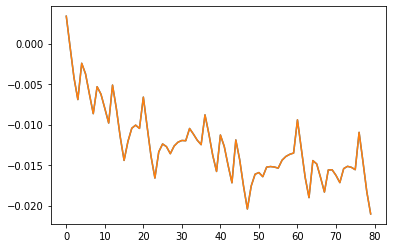

In [12]:
# Training
S_trainf, J_trainf = snrf.transform(x_train,params)

np.size(S_trainf)

print(S_trainf)
S_trainf_1d = np.expand_dims(np.ravel(S_trainf, order='C'), axis = -1)
plt.figure()
plt.plot(S_trainf_1d)

# Training
S_trainf, J_trainf = snrf.transform(x_train,params)
np.size(S_trainf)

print(S_trainf)
S_trainf_1d = np.expand_dims(np.ravel(S_trainf, order='C'), axis = -1)
plt.plot(S_trainf_1d)

In [13]:
RR.Kfold_train(netf,S_trainf,y_train,10, quiet = False, seed_training=seed_training)

Seed Training: 1234
l= 4.5399929762484854e-05 0.007972822266131179
l= 5.017468205617528e-05 0.007987563659830896
l= 5.5451599432176945e-05 0.008000086729906685
l= 6.128349505322202e-05 0.008010541601937494
l= 6.772873649085378e-05 0.008019073425319856
l= 7.485182988770046e-05 0.008025821011931257
l= 8.272406555663209e-05 0.008030915558925818
l= 9.142423147817311e-05 0.008034479469369162
l= 0.00010103940183709307 0.008036625303235541
l= 0.00011166580849011438 0.00803745490663977
l= 0.0001234098040866791 0.008037058777050651
l= 0.0001363889264820109 0.008035515724996183
l= 0.00015073307509547596 0.00803289288753452
l= 0.00016658581098763264 0.008029246135328717
l= 0.00018410579366757822 0.008024620894647946
l= 0.00020346836901064308 0.008019053379764798
l= 0.000224867324178847 0.00801257220262051
l= 0.00024851682710795055 0.00800520029838054
l= 0.0002746535699721406 0.007996957080402788
l= 0.0003035391380788646 0.007987860718917508
l= 0.00033546262790250947 0.007977930426093868
l= 0.0003

0.0

Check training is the same

[[-2.90796957e+01]
 [-7.49690716e+01]
 [ 2.87374552e+02]
 [-1.88710967e+02]
 [ 1.94409770e-01]]
[[ 2.50424641e+02]
 [-9.97369278e+02]
 [ 1.42838231e+03]
 [-6.84748919e+02]
 [ 2.37580023e-01]]


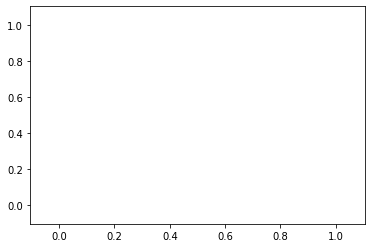

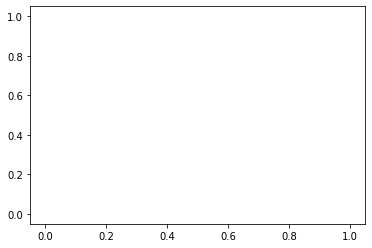

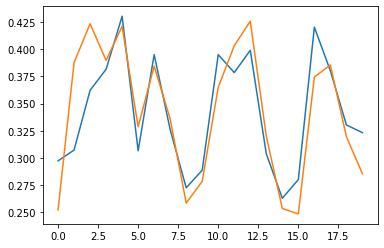

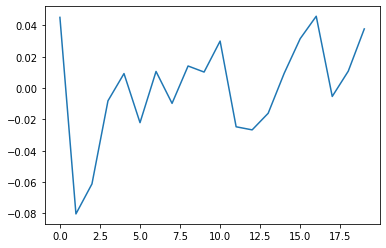

In [14]:
S_trains_1d = np.expand_dims(np.ravel(S_trains, order='C'), axis = -1)
S_trainf_1d = np.expand_dims(np.ravel(S_trainf, order='C'), axis = -1)

start = 500
window = 50
end = start + window
plt.plot(S_trains_1d[start:end])
plt.plot(S_trainf_1d[start:end])
plt.figure()
plt.plot(S_trains_1d[start:end]-S_trainf_1d[start:end])

train_preds = nets.forward(S_trains)
train_predf = netf.forward(S_trainf)

plt.figure()
plt.plot(train_preds)
plt.plot(train_predf)
plt.figure()
plt.plot(train_preds-train_predf)

print(nets.W[0:10])
print(netf.W[0:10])

Set spacer

In [31]:
spacer = 10

Testing

Spacer NRMSE:10
Using Nthreads =  1
Using Nthreads =  1
0.6556315280350766
0.6594128071775085


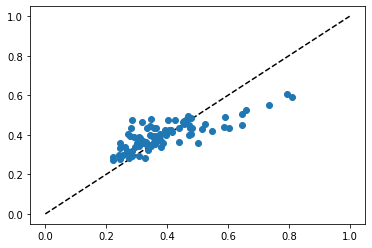

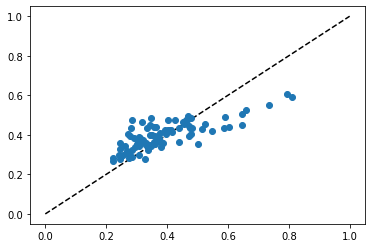

In [32]:
print("Spacer NRMSE:"+str(spacer))

 # Testing
S_tests, J_tests = snrs.transform(x_test,params)
S_testf, J_testf = snrf.transform(x_test,params)

preds = nets.forward(S_tests)
predf = netf.forward(S_testf)

predNRMSEs = NRMSE(preds, y_test, spacer=spacer)
print( predNRMSEs)

predNRMSEf = NRMSE(predf, y_test, spacer=spacer)
print( predNRMSEf)

plt.figure()
plt.plot( np.linspace(0.0,1.0), np.linspace(0.0,1.0), 'k--')
plt.plot(y_test[spacer:], preds[spacer:], 'o')

plt.figure()
plt.plot( np.linspace(0.0,1.0), np.linspace(0.0,1.0), 'k--')
plt.plot(y_test[spacer:], predf[spacer:], 'o')

Compare to running in loaded code

seed NARMA: 1234
Samples for training:  200
Samples for test:  100
Nin = 1 , Nout =  200 , Nvirt =  40
Deterministic mask will be used
1234
Using Nthreads =  1
Seed Training: 1234
Using Nthreads =  1
Spacer NRMSE:10
0.006734826045532479 0.6613385816672588


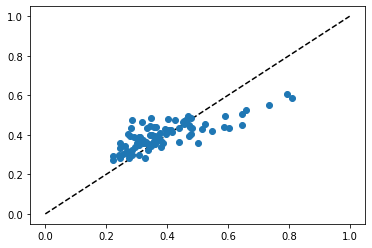

seed NARMA: 1234
Samples for training:  200
Samples for test:  100
Nin = 1 , Nout =  200 , Nvirt =  40
Deterministic mask will be used
1234
Using Nthreads =  1
Seed Training: 1234
Using Nthreads =  1
Spacer NRMSE:10
0.006782206972407362 0.6644750355891712


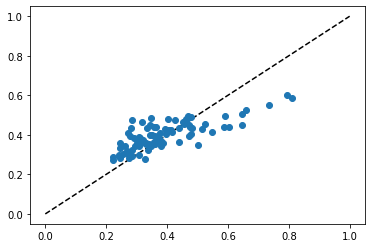

In [53]:
# DO IT
(y_test_s,y_pred_s)=ml.spnc_narma10(Ntrain, Ntest, Nvirt, m0, bias, transforms, params, seed_NARMA=1234,fixed_mask=True, return_outputs=True,spacer_NRMSE = spacer)

# DO IT
(y_test_f,y_pred_f)=ml.spnc_narma10(Ntrain, Ntest, Nvirt, m0, bias, transformf, params, seed_NARMA=1234,fixed_mask=True, return_outputs=True,spacer_NRMSE = spacer)